In [56]:
import torch
import os
os.chdir("/Users/zyxu/Documents/py/NLP/icl-norm/")
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
norms = np.load("save/norms_Llama-2-7b-hf.npy")

In [58]:
norms[:,-1]

array([0.20794341, 0.21889393, 0.0169725 , 0.21265173, 0.21126997,
       0.02330276, 0.01458439, 0.21698293, 0.22245897, 0.01681085,
       0.03113431, 0.2186883 , 0.01926616, 0.01948196, 0.02461131,
       0.01581044, 0.21611942, 0.21903744, 0.21259892, 0.22187573,
       0.01717812, 0.01522982, 0.01454041, 0.02625102, 0.22239542,
       0.01375103, 0.02733243, 0.22428016, 0.21588536, 0.01363888,
       0.01453727, 0.08365016, 0.19460611, 0.01631554, 0.22164877,
       0.19324628, 0.01804957, 0.01323253, 0.22001573, 0.21655457,
       0.21247475, 0.02462195, 0.0170516 , 0.01194228, 0.22253864,
       0.19660884, 0.2276461 , 0.01710036, 0.01652282, 0.01811534,
       0.02254273, 0.02188634, 0.21098094, 0.21466377, 0.01237767,
       0.23073836, 0.0109022 , 0.21601085, 0.01028441, 0.20449544,
       0.21535276, 0.0150839 , 0.01353571, 0.00997549, 0.19295086,
       0.01987505, 0.02003745, 0.21434386, 0.01730113, 0.01392148,
       0.0189707 , 0.01425712, 0.21105349, 0.21157709, 0.21539

In [59]:
norms = []
for name in ["norms_Llama-2-7b-hf.npy", "norms_Llama-2-13b-hf.npy", "norms_Llama-2-70b-hf.npy"]:
    tmp = np.load(f"save/{name}")
    norms.append(tmp)
norms = np.concatenate(norms)

In [60]:

df = pd.DataFrame(norms)
df.columns = ["pos_rel", "pos_irre", "neg_rel", "neg_irre"]
df['models'] = np.repeat(["norms_Llama-2-7b-hf", "norms_Llama-2-13b-hf", "norms_Llama-2-70b-hf"], 100)

In [61]:
df

,pos_rel,pos_irre,neg_rel,neg_irre,models
0,0.370774,0.225716,0.381791,0.207943,norms_Llama-2-7b-hf
1,0.368623,0.232305,0.371559,0.218894,norms_Llama-2-7b-hf
2,0.608282,0.018360,0.586558,0.016972,norms_Llama-2-7b-hf
3,0.374446,0.220059,0.380276,0.212652,norms_Llama-2-7b-hf
4,0.379929,0.214425,0.371490,0.211270,norms_Llama-2-7b-hf
...,...,...,...,...,...
295,0.256592,0.309082,0.248535,0.301270,norms_Llama-2-70b-hf
296,0.230225,0.315918,0.231445,0.324951,norms_Llama-2-70b-hf
297,0.350342,0.015305,0.351807,0.016022,norms_Llama-2-70b-hf
298,0.054871,0.012154,0.054871,0.012154,norms_Llama-2-70b-hf


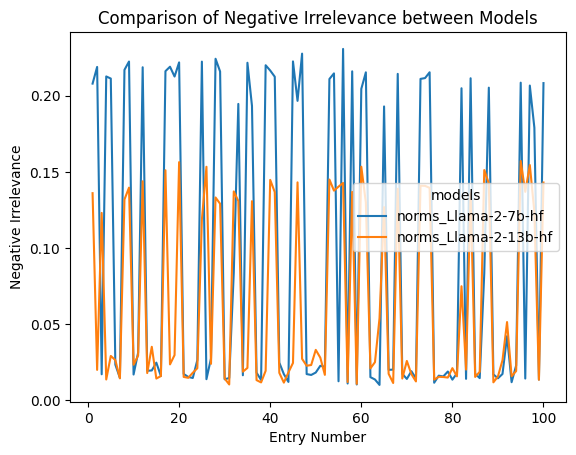

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame after loading it from the file where it's saved

# Filter the DataFrame for each model
df_model_1 = df[df['models'] == 'norms_Llama-2-7b-hf'].reset_index()
df_model_2 = df[df['models'] == 'norms_Llama-2-13b-hf'].reset_index()

# Add a column for Entry Number to both DataFrames
df_model_1['Entry'] = df_model_1.index + 1
df_model_2['Entry'] = df_model_2.index + 1

# Combine the two DataFrames
combined_df = pd.concat([df_model_1, df_model_2], ignore_index=True)

# Plotting using Seaborn
sns.lineplot(x='Entry', y='neg_irre', hue='models', data=combined_df)

# Customize the plot
plt.xlabel('Entry Number')
plt.ylabel('Negative Irrelevance')
plt.title('Comparison of Negative Irrelevance between Models')

# Display the plot
plt.show()


In [63]:
combined_df

,index,pos_rel,pos_irre,neg_rel,neg_irre,models,Entry
0,0,0.370774,0.225716,0.381791,0.207943,norms_Llama-2-7b-hf,1
1,1,0.368623,0.232305,0.371559,0.218894,norms_Llama-2-7b-hf,2
2,2,0.608282,0.018360,0.586558,0.016972,norms_Llama-2-7b-hf,3
3,3,0.374446,0.220059,0.380276,0.212652,norms_Llama-2-7b-hf,4
4,4,0.379929,0.214425,0.371490,0.211270,norms_Llama-2-7b-hf,5
...,...,...,...,...,...,...,...
195,195,0.495724,0.143495,0.487549,0.136851,norms_Llama-2-13b-hf,96
196,196,0.421570,0.150616,0.425123,0.154442,norms_Llama-2-13b-hf,97
197,197,0.479868,0.133591,0.477660,0.123733,norms_Llama-2-13b-hf,98
198,198,0.557035,0.013367,0.557035,0.013367,norms_Llama-2-13b-hf,99


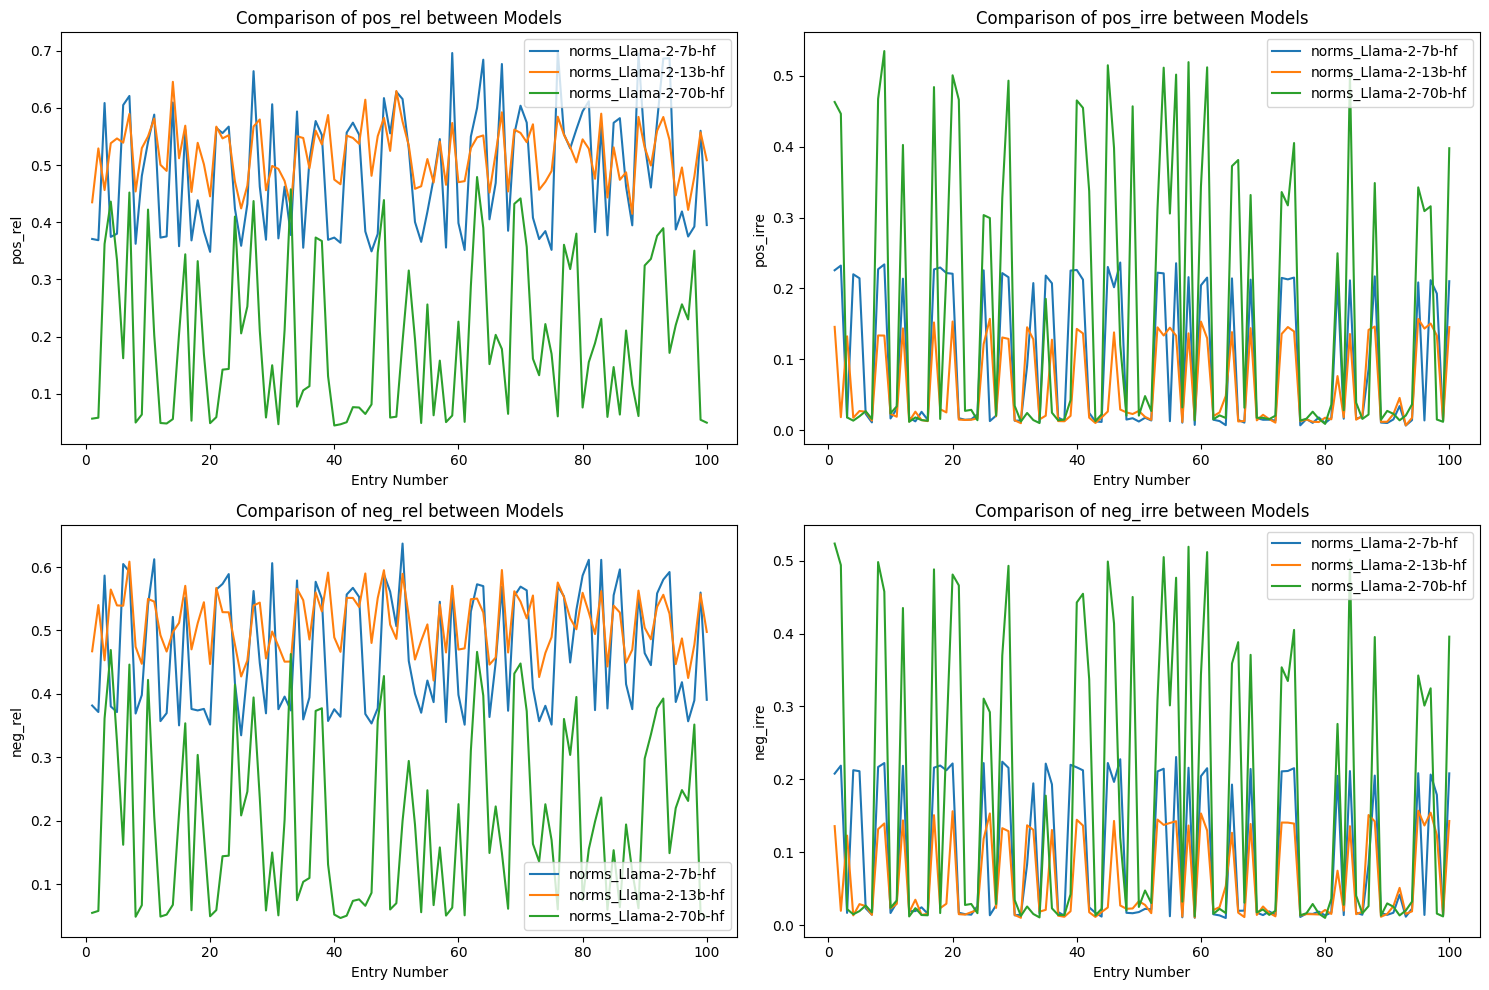

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame after loading it from the file where it's saved

# Separate the data by model
df_7b_hf = df[df['models'] == 'norms_Llama-2-7b-hf'].reset_index()
df_13b_hf = df[df['models'] == 'norms_Llama-2-13b-hf'].reset_index()
df_70b_hf = df[df['models'] == 'norms_Llama-2-70b-hf'].reset_index()


# Add a column for Entry Number to both DataFrames
df_7b_hf['Entry'] = df_7b_hf.index + 1
df_13b_hf['Entry'] = df_13b_hf.index + 1
df_70b_hf['Entry'] = df_70b_hf.index + 1
# Combine the two DataFrames
combined_df = pd.concat([df_7b_hf, df_13b_hf, df_70b_hf], ignore_index=True)

# Define the columns to plot
columns_to_plot = ['pos_rel', 'pos_irre', 'neg_rel', 'neg_irre']

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(columns_to_plot):
    sns.lineplot(x='Entry', y=col, hue='models',ax=axs[i], data = combined_df)
    axs[i].set_title(f'Comparison of {col} between Models')
    axs[i].set_xlabel('Entry Number')
    axs[i].set_ylabel(col)
    axs[i].legend()

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()
